<a href="https://colab.research.google.com/github/vbaezfortunato/Python_class/blob/master/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando el dataset de fashion MNIST realizar:

PCA sin sklearn para reducir a 2 dimensiones

*   Anotar la cantidad de varianza preservada.
*   t-SNE con sklearn para reducir a 2 dimensiones.
*   Analizar ambas representaciones, comparar y concluir
*  Aplicar clustering con sklearn sobre representación reducida.
*  Ya que este dataset si posee etiquetas "y" (tipos de prendas), analizar si * * los clusters encontrados tienden a agrupar el mismo tipo de prenda o prendas similares.


In [ ]:

from tensorflow import keras
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from scipy.linalg import svd
import seaborn as sns
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load the Data Set
fashion_mnist = keras.datasets.fashion_mnist
(tr_images, tr_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def image_scaled(images):

    
    tensor = images.reshape(-1, 28 * 28)
    tensor = scale(tensor)
    
    print(tensor.shape)
    return tensor

Testing


In [ ]:
whole_ds = np.concatenate((tr_images, test_images), axis = 0)
scaled = image_scaled(whole_ds)


(70000, 784)


**PCA**

In [ ]:
class PCA_n: 
    def __init__(self,dataset, k_dimensions):
        
        self.data = dataset
        self.k = k_dimensions
        self.variance = 0
        self.principal_components = 0
    
    def __SVD(self):
        
        cov_matrix = np.cov(self.data, rowvar = False)
        U, variance, _ = svd(cov_matrix)
        return U, variance
        
    def __variance(self):
        
        _, variance = self.__SVD()
        variance_pc = np.sum(variance[:self.k])/ np.sum(variance)
        return variance_pc
    
    def fit(self):
        
        U, _ = self.__SVD()
        self.variance = self.__variance()
        U_reduced = U[:, :self.k]
        self.principal_components = np.matmul(self.data, U_reduced)

In [ ]:
pca_ds = PCA_n(scaled,4)

fit

Note: Just must run the fit before principal components or **variance**

In [ ]:
pca_ds.fit()

Variance is Cero because i did not run the fit funcion



In [ ]:
pca_ds.variance

0.47048241933716234

# **PCA of the Dataset**

In [ ]:
pca_ds.principal_components

array([[  0.82469513, -20.86260448, -12.906047  ,   3.46000391],
       [-17.07338982,   4.96621704,  -2.00699267,   5.97687242],
       [  9.60003596,  12.32192784,   1.11963308,   2.56029247],
       ...,
       [  6.99353047,   8.48864653,   0.39553054,   6.61109639],
       [  2.8922854 ,  15.3764669 ,  -7.59981403,  -0.97795603],
       [ 17.53224758,  -0.12483318,   3.25432528,  -0.76725477]])

# **SNE**

In [ ]:
TSNE_m = TSNE(n_components=2, verbose = 1)

In [ ]:
model = PCA(n_components=5)

In [ ]:
model.fit_transform(scaled)

array([[ -0.82469513,  20.86260447, -12.90604768,   3.46000418,
         -6.68512642],
       [ 17.07338982,  -4.96621704,  -2.00699247,   5.97687498,
         10.89045154],
       [ -9.60003596, -12.32192784,   1.11963377,   2.56029228,
          0.22146332],
       ...,
       [ -6.99353047,  -8.48864652,   0.39553184,   6.61109217,
         -1.26213249],
       [ -2.8922854 , -15.37646691,  -7.59981456,  -0.97795112,
         -1.68061243],
       [-17.53224758,   0.12483318,   3.25432534,  -0.76725457,
         -1.57489079]])

In [ ]:
TSNE_m.fit_transform(scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 20.331s...
[t-SNE] Computed neighbors for 70000 samples in 9607.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for

array([[ 22.91757  ,  29.788996 ],
       [  1.5677342, -48.43097  ],
       [ 21.727825 ,  -8.953533 ],
       ...,
       [-43.047573 , -23.75932  ],
       [ 29.862774 ,  14.266422 ],
       [ -4.4028406,  29.42154  ]], dtype=float32)

In [ ]:
TSNE_m.embedding_

array([[ 22.91757  ,  29.788996 ],
       [  1.5677342, -48.43097  ],
       [ 21.727825 ,  -8.953533 ],
       ...,
       [-43.047573 , -23.75932  ],
       [ 29.862774 ,  14.266422 ],
       [ -4.4028406,  29.42154  ]], dtype=float32)

In [ ]:

labels = np.concatenate((tr_labels, test_labels), axis = 0)

In [ ]:
label_dictionary = { 0: "Trouser", 1: "Pullover", 2: "Dress",3:"T-shirt/top", 4: "Coat", 5: "Sandal",6: "Sneaker", 7: "Bag", 8: "Shirt",  9: "Ankle boot"}

In [ ]:
out = list()
for i in labels :
    x = label_dictionary.get(i)
    out.append(x)

Visualizacion



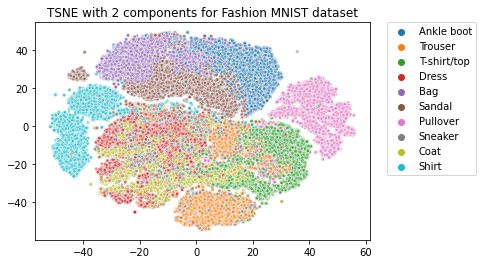

In [ ]:
sns.scatterplot(x = TSNE_m.embedding_[:,0], y = TSNE_m.embedding_[:,1], hue = out, s = 12, alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset")
plt.show()

Como se puede observar en el grafico anterior TSNE function  realiza una buena segmentacion a nivel generar pero en algunos casos los productos que tiene caracteristicas iguales o muy parecidas se mezcla como coat y dress por lo que se puede decir que cuando una mujer comprar un dress puede selecionar a coat en la misma compra.

Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmeans_TSNE = KMeans(n_clusters = 10)

In [ ]:
Kmeans_TSNE.fit(TSNE_m.embedding_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmeans_TSNE.predict(TSNE_m.embedding_)

array([ 8,  4,  0, ...,  6, 10,  5], dtype=int32)

In [ ]:
dictionary_kmeans = {0:"A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "J"}

In [ ]:
out_kmeans = list()
for i in Kmeans_TSNE.labels_:
    x = dictionary_kmeans.get(i)
    out_kmeans.append(x)

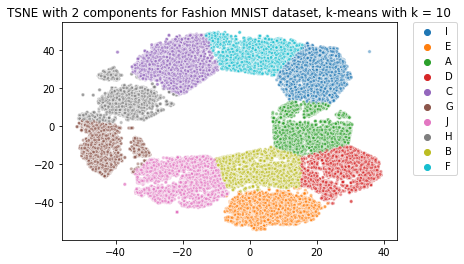

In [ ]:

sns.scatterplot(x = TSNE_m.embedding_[:,0], y = TSNE_m.embedding_[:,1], hue = out_kmeans, s = 12, alpha = 0.5, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset, k-means with k = 10")
plt.show()

Con Kmeans se puede observar una segregacion mas clara que en la grafica anterior, se utilizaron 10 folds la misma cantidad de las prendas

PCA

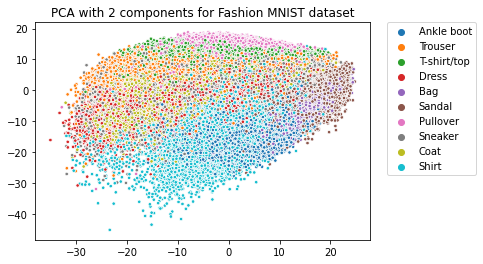

In [ ]:
sns.scatterplot(x = pca_ds.principal_components[:,0], y = pca_ds.principal_components[:,1], hue = out, s = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA with 2 components for Fashion MNIST dataset")
plt.show()

Con la funcion PCA de numpy se puede observar que la segregacion no es tan significativa como TSNE.  realice una preba anterior con dos Componetes pero la varianza fue menos que 40% por lo que elegir PCA con 4 componetes aunque la varianza no llego a ser mayor al 50% pero fue mayor a 40%

Varianza = 47%


PCA Kmeans

In [ ]:
Kmeans_PCA = KMeans(n_clusters = 15)

In [ ]:
Kmeans_PCA.fit(pca_ds.principal_components)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
out_pca = list()
for i in Kmeans_PCA.labels_:
    x = dictionary_kmeans.get(i)
    out_pca.append(x)

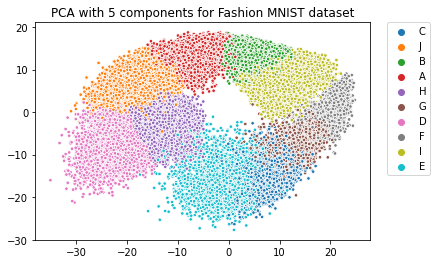

In [ ]:

sns.scatterplot(x = pca_ds.principal_components[:,0], y = pca_ds.principal_components[:,1], hue = out_pca, s = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA with 5 components for Fashion MNIST dataset")
plt.show()

Se observa que los clusters generados por el algoritmo de K-means en el embedding obtenido por medio de PCA crea ciertas fronteras muy bien delimitadas

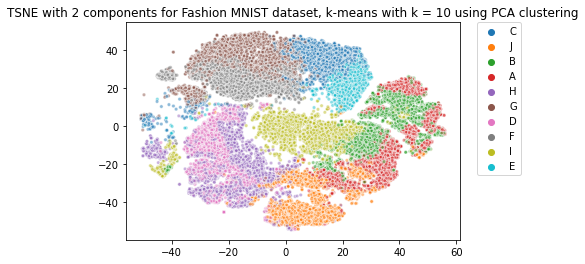

In [ ]:
sns.scatterplot(x = TSNE_m.embedding_[:,0], y = TSNE_m.embedding_[:,1], hue = out_pca, s = 12, alpha = 0.5, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset, k-means with k = 10 using PCA clustering")
plt.show()

se hace una breve comparación entre los dos modelos, se decide hacer la gráfica de los embeddings generados por tTSNE utilizando los clusters generados por el K-means en los cuatros componentes principales de PCA. se puede observar que las segregaciones no esta tan clara con la primera grafica pero si se observa que existe una tendencia entre algunos productos.



# Conclusion

1.   PCA with numpy realizo un mejor desempeno cuando utilice  4 componentes en lugar de 2
2.   PCA de sklearn.decomposition realizar un excelente performance en comparacion PCA numpy que cree.

3.   TSNE fit proceso me duro aproximadamente 3 horas de ejecucion aparentemente por la cantidad de registros




